<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# The Normal Distribution and the Central Limit Theorem

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats

In [3]:
import pandas as pd

data = pd.read_csv('../../../../../resource-datasets/bikeshare/bikeshare.csv')
print(data.shape)

data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


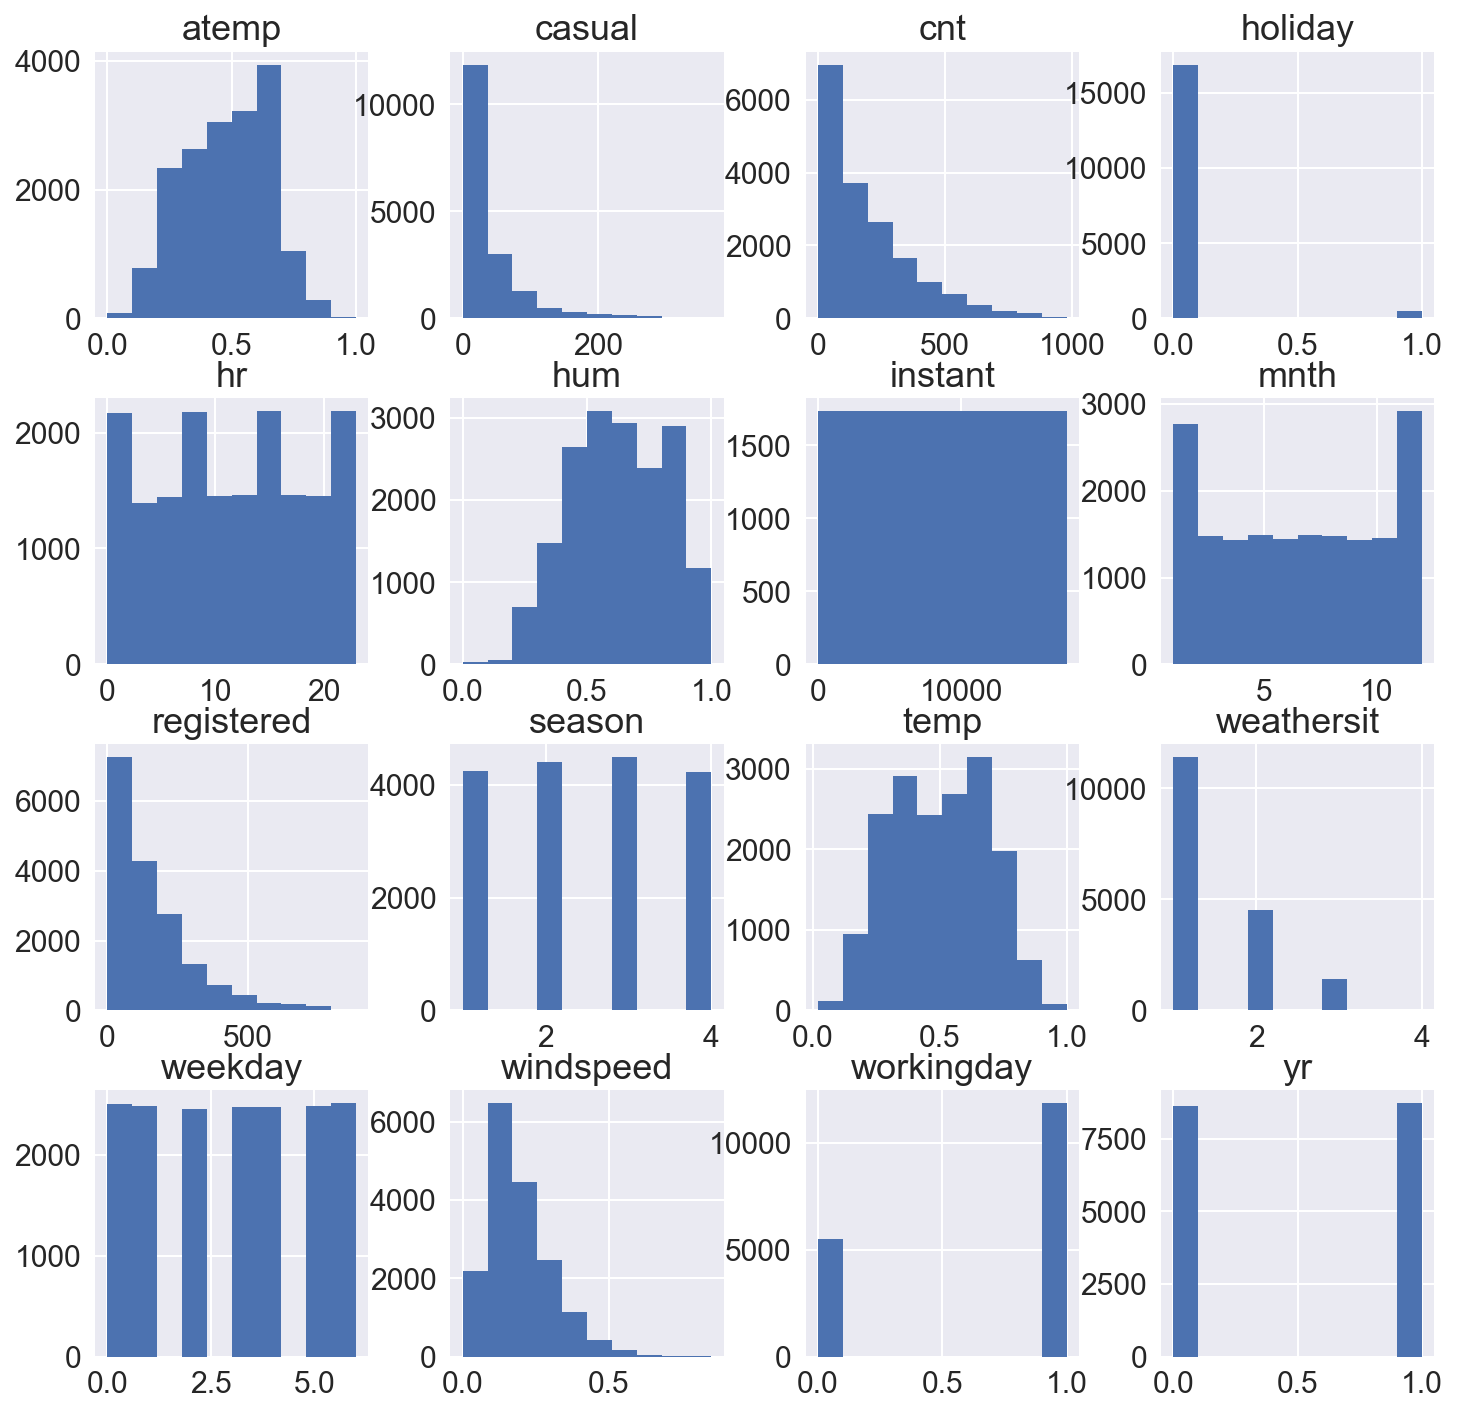

In [4]:
data.hist(figsize=(12,12));

**Below is a function that will plot a distribution (as a list of numbers). Plot the distribution of a few variables using this function.**

Are these variables normally distributed?

In [5]:
def dist_plotter(sample,bins=50,kde=False):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=bins, kde=kde)
    plt.show()

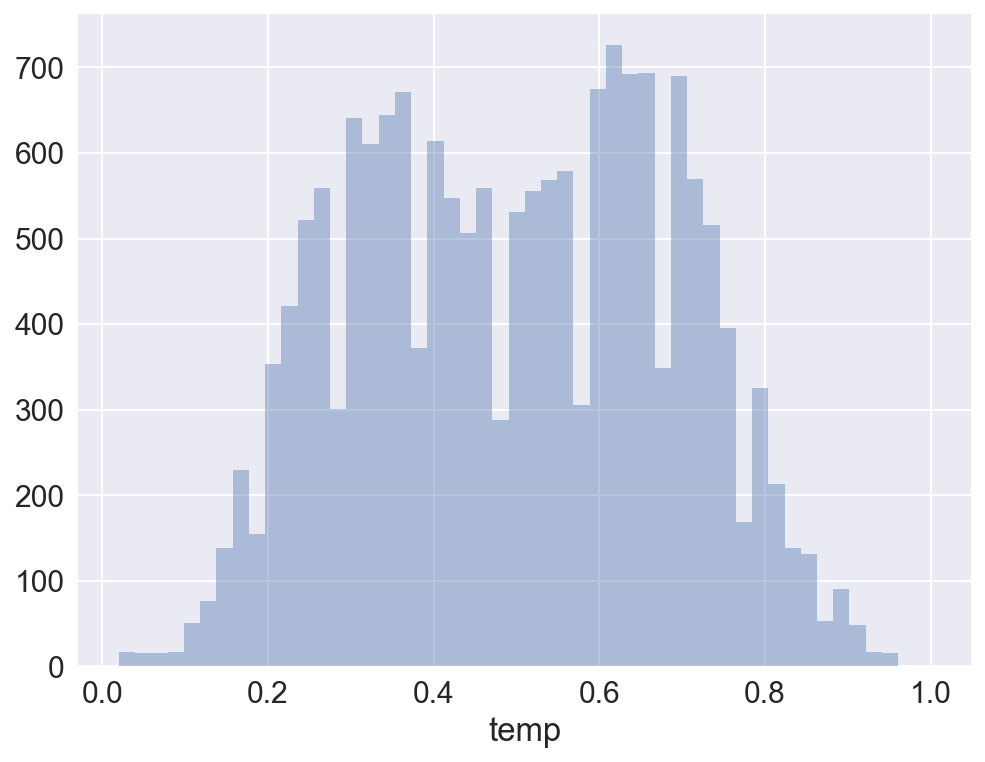

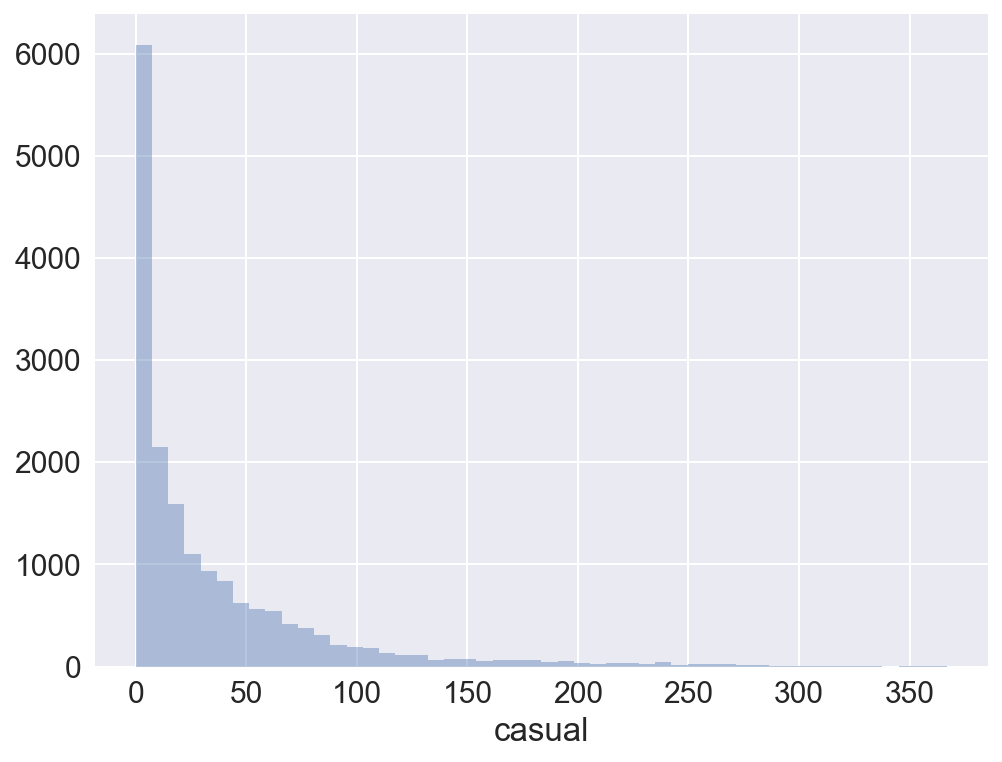

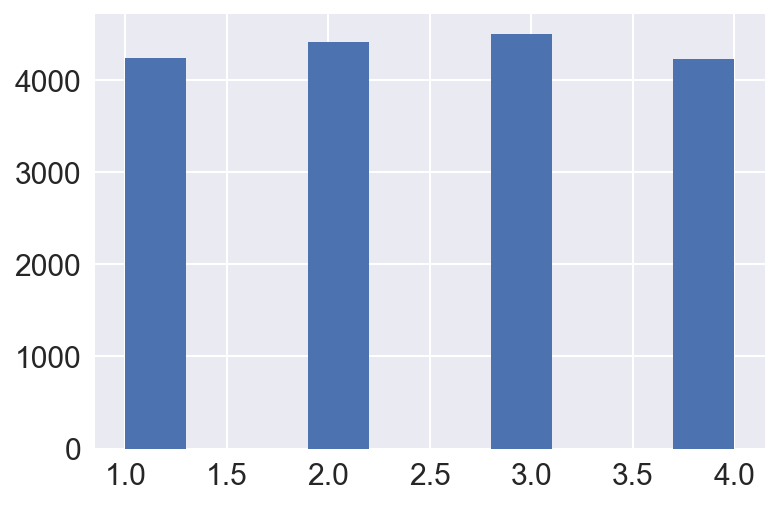

In [6]:
dist_plotter(data.temp)
dist_plotter(data.casual)
data.season.hist();

**Write a function that will take a random sample of given size $n$ of any of the variables above a 1000 times, calculate the means of the samples, and return the sample means as a new list.**

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [7]:
def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

**Plot the sample means using the distribution plotter function.**

Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

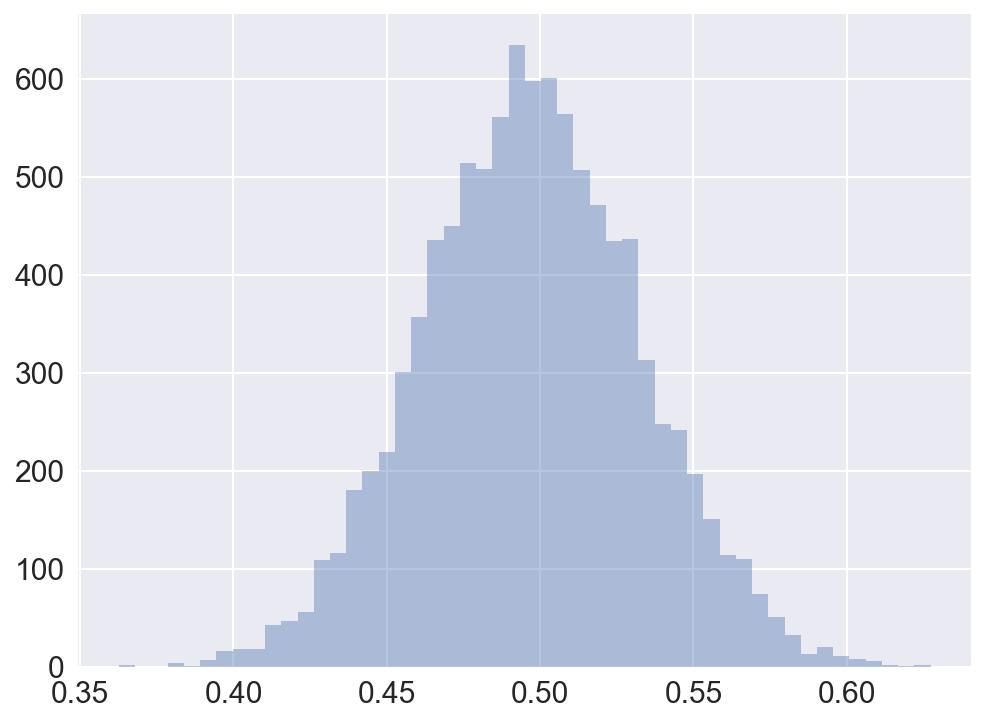

In [8]:
n = 30
k = 10000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

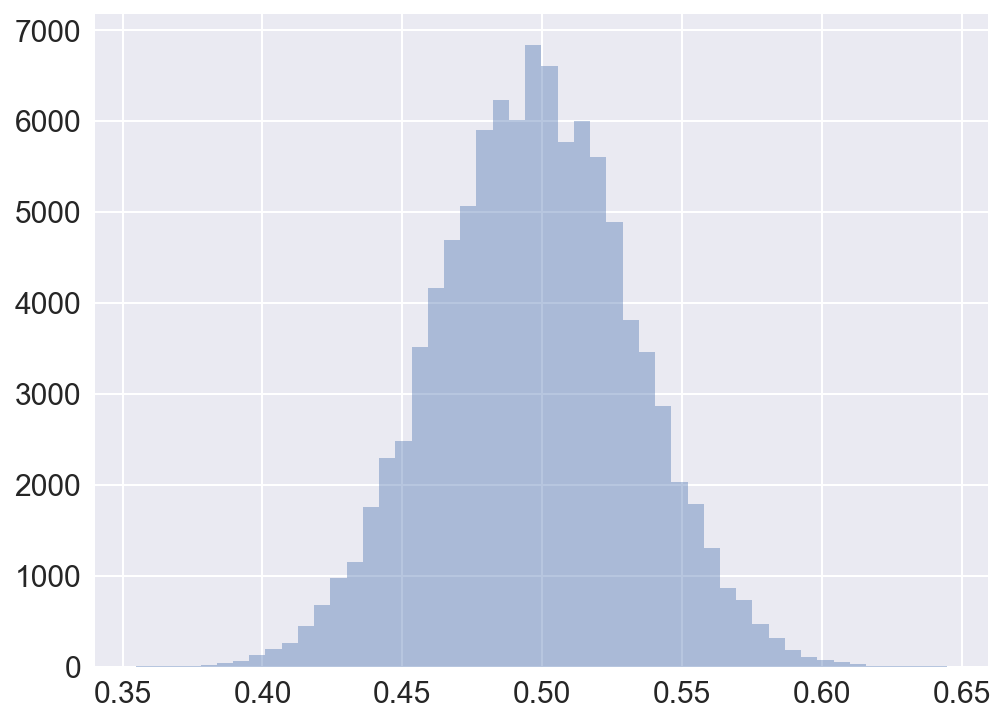

In [9]:
n = 30
k = 100000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

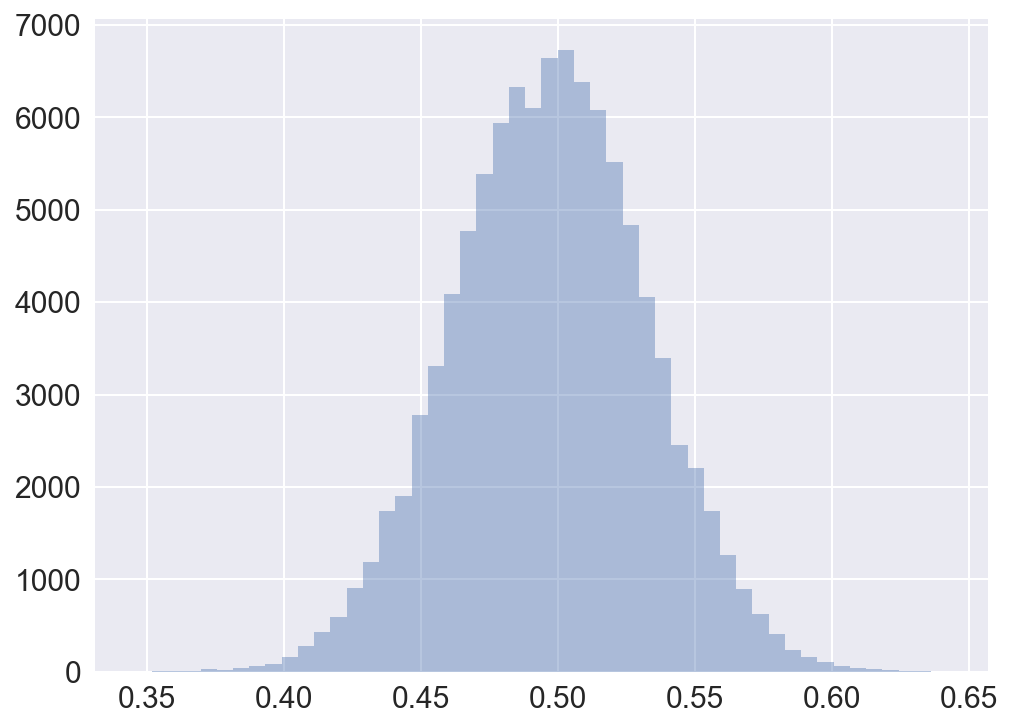

In [10]:
n = 30
k = 100000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

We can check with the quantile-quantile plot.

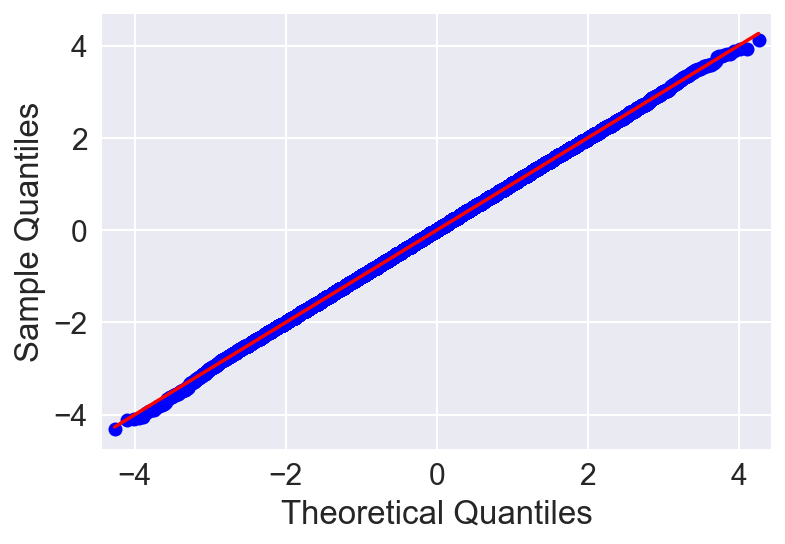

In [11]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.array(means),line='s',fit=True);

### Independent practice

<a id='independent-practice'></a>

---

#### Use other variables from the dataset to test the central limit theorem. Vary $n$ and $k$ until you get a sufficiently normal distribution of the sample means.

Warning: The more skewed the distribution, the more you will have to increase both $n$ and $k$.

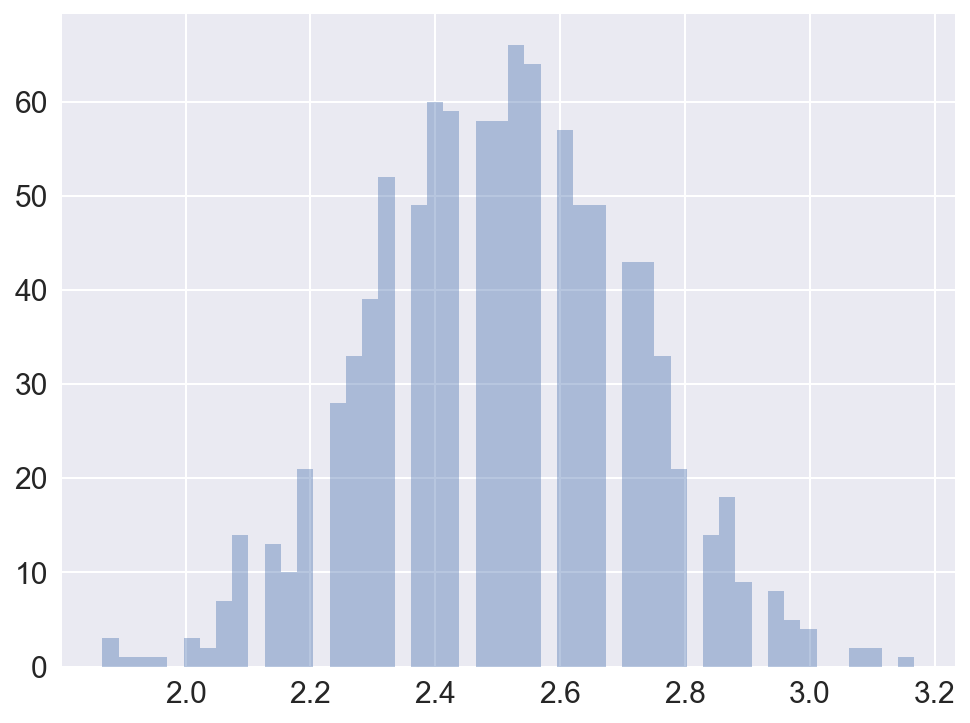

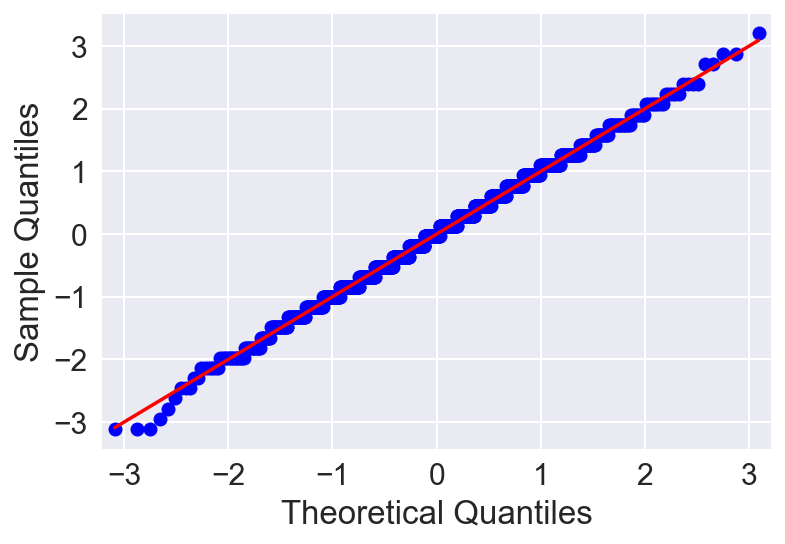

In [12]:
# for the season column
n = 30
k = 1000
means = sampler(data.season,n=n,k=k)
dist_plotter(means)
qqplot(np.array(means),line='s',fit=True);

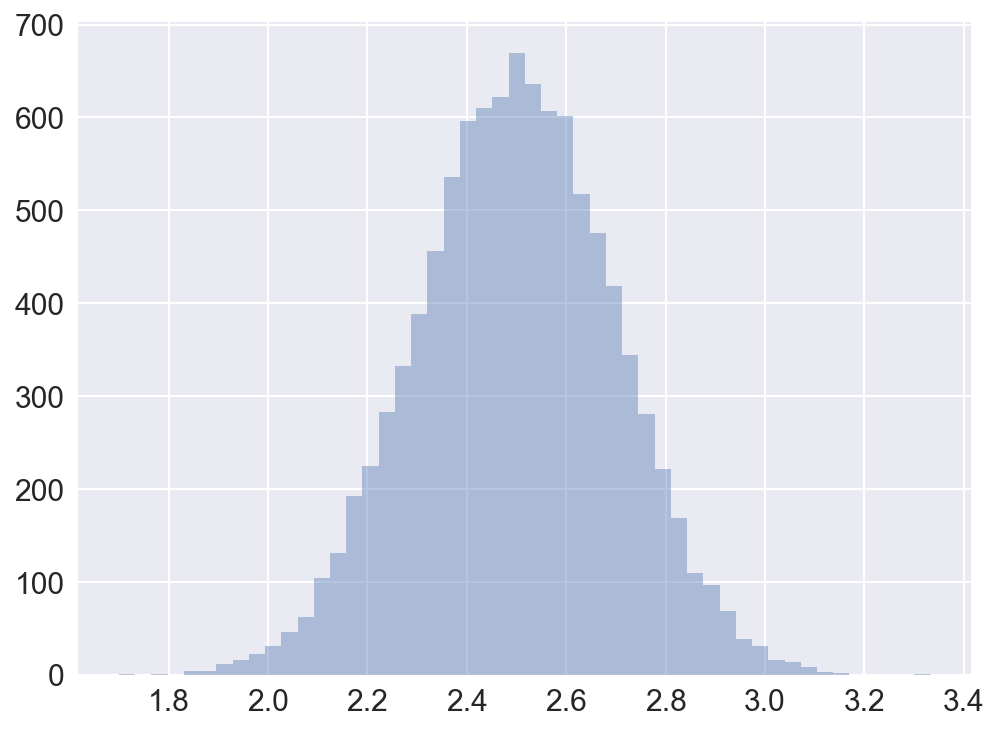

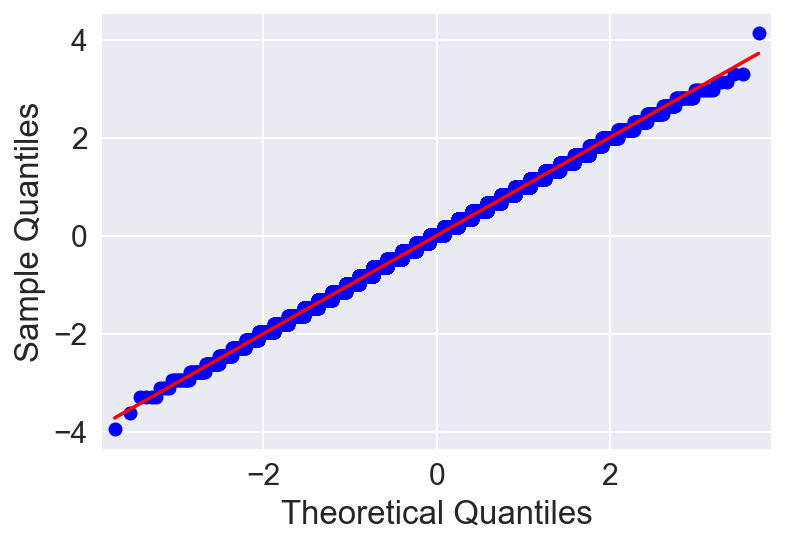

In [13]:
# for the season column with more draws
n = 30
k = 10000
means = sampler(data.season,n=n,k=k)
dist_plotter(means)
qqplot(np.array(means),line='s',fit=True);

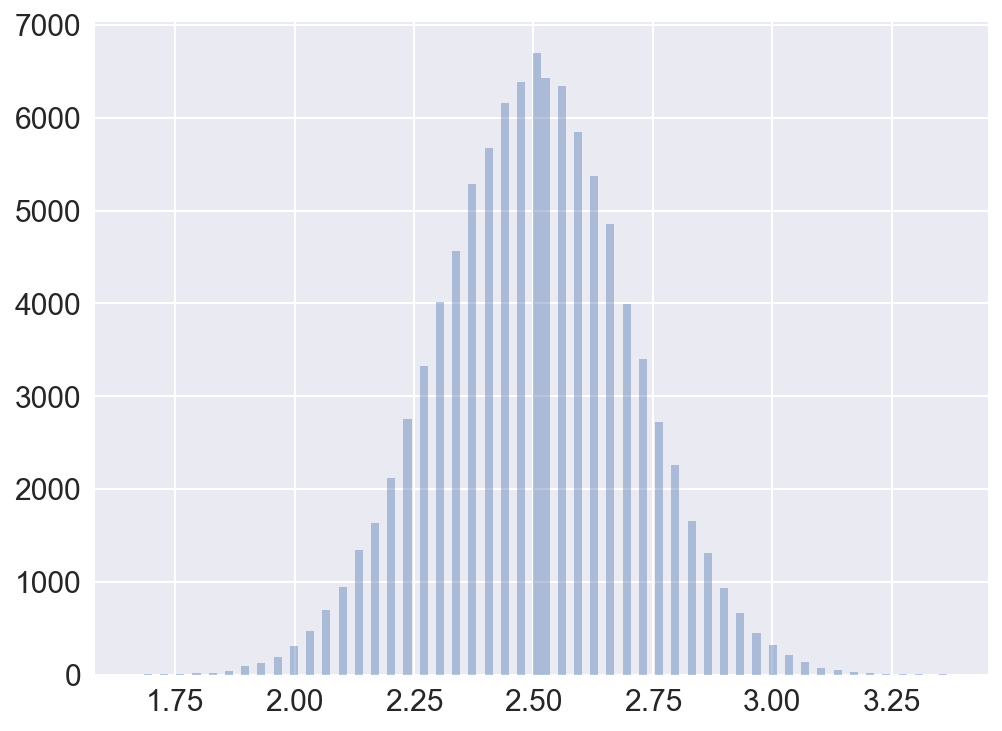

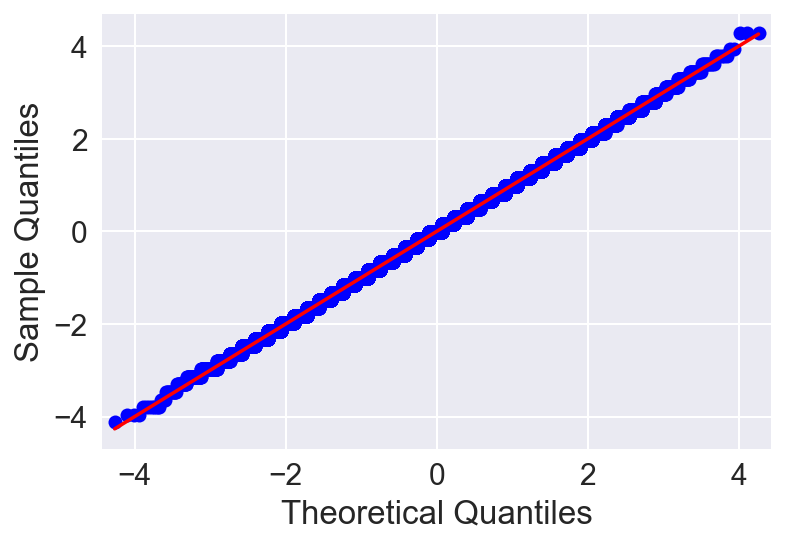

In [14]:
# for the season column with even more draws
n = 30
k = 100000
means = sampler(data.season,n=n,k=k)
dist_plotter(means,bins=100)
qqplot(np.array(means),line='s',fit=True);

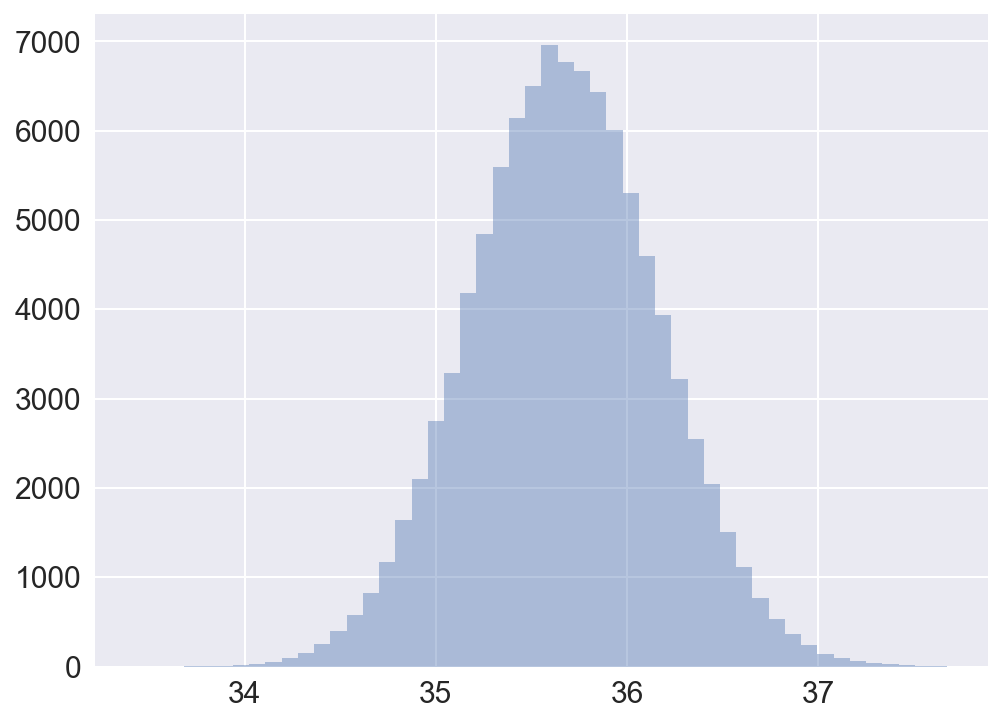

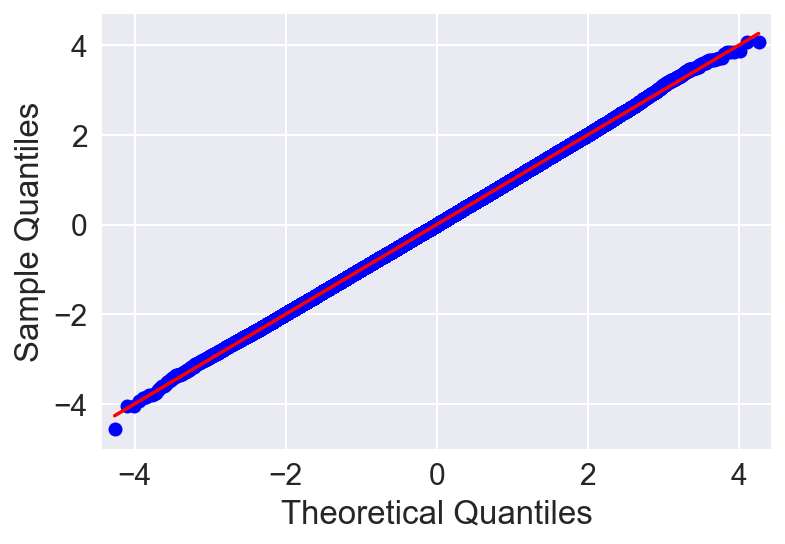

In [15]:
# for the casual column
n = 10000
k = 100000
means = sampler(data.casual,n=n,k=k)
dist_plotter(means)
qqplot(np.array(means),line='s',fit=True);

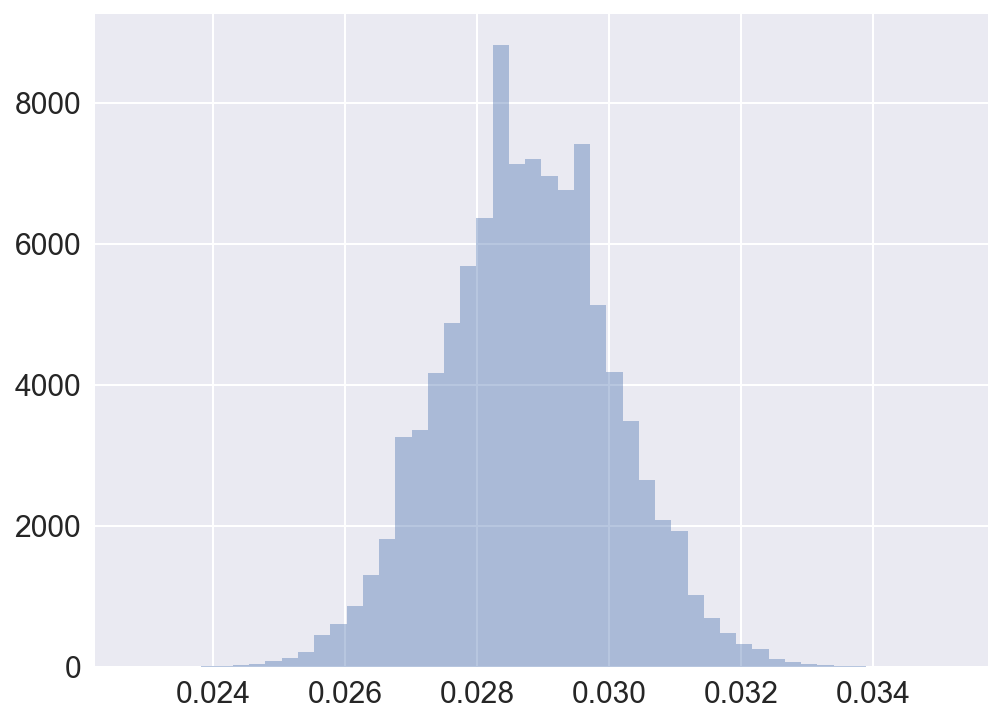

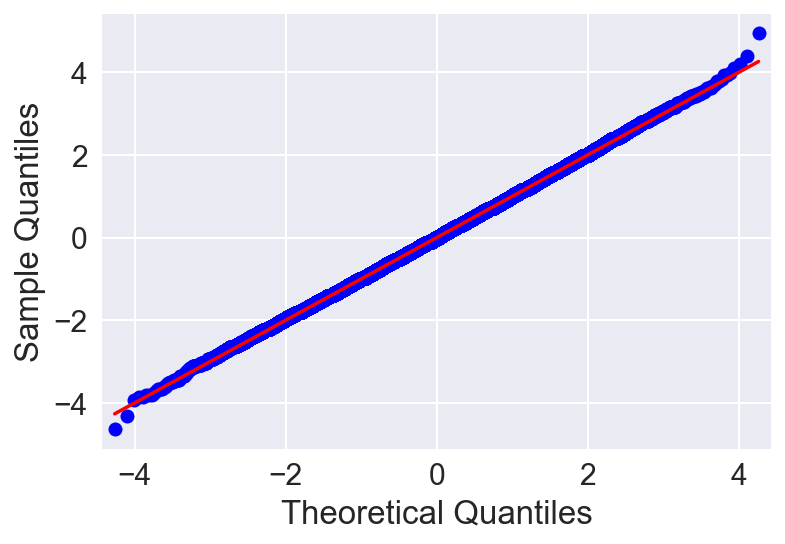

In [16]:
# for the holiday column
n = 17000
k = 100000
means = sampler(data.holiday,n=n,k=k)
dist_plotter(means)
qqplot(np.array(means),line='s',fit=True);